<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA(Exploratory-Data-Analysis)" data-toc-modified-id="EDA(Exploratory-Data-Analysis)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA(Exploratory Data Analysis)</a></span><ul class="toc-item"><li><span><a href="#Numerical-variables-(int64-and-float64)" data-toc-modified-id="Numerical-variables-(int64-and-float64)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Numerical variables (int64 and float64)</a></span></li><li><span><a href="#Which-features-are-important-to-determine-the-price?" data-toc-modified-id="Which-features-are-important-to-determine-the-price?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Which features are important to determine the price?</a></span></li></ul></li><li><span><a href="#What-to-do-with-categorical-data?" data-toc-modified-id="What-to-do-with-categorical-data?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What to do with categorical data?</a></span><ul class="toc-item"><li><span><a href="#Relationship-between-categorical-variable-and-numerical" data-toc-modified-id="Relationship-between-categorical-variable-and-numerical-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Relationship between categorical variable and numerical</a></span></li><li><span><a href="#Value-Counts" data-toc-modified-id="Value-Counts-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Value Counts</a></span></li><li><span><a href="#Basics-of-Grouping" data-toc-modified-id="Basics-of-Grouping-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Basics of Grouping</a></span></li></ul></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correlation</a></span><ul class="toc-item"><li><span><a href="#Pearson-Correlation" data-toc-modified-id="Pearson-Correlation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pearson Correlation</a></span></li></ul></li><li><span><a href="#ANOVA" data-toc-modified-id="ANOVA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ANOVA</a></span><ul class="toc-item"><li><span><a href="#ANOVA:-Analysis-of-Variance" data-toc-modified-id="ANOVA:-Analysis-of-Variance-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ANOVA: Analysis of Variance</a></span></li><li><span><a href="#Drive-Wheels" data-toc-modified-id="Drive-Wheels-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Drive Wheels</a></span></li></ul></li><li><span><a href="#Conclusion:-Important-Variables" data-toc-modified-id="Conclusion:-Important-Variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion: Important Variables</a></span></li><li><span><a href="#Data-from-JARVIS-DFT-material-science-database-for-transport" data-toc-modified-id="Data-from-JARVIS-DFT-material-science-database-for-transport-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data from JARVIS-DFT material science database for transport</a></span></li><li><span><a href="#A-little-bit-more-about-getting-data." data-toc-modified-id="A-little-bit-more-about-getting-data.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>A little bit more about getting data.</a></span></li></ul></div>

## EDA(Exploratory Data Analysis)

Exploratory Data Analysis, or in short “EDA”, is an approach to analyze data in order to:
- summarize main characteristics of the data
- gain better understanding of the data-set,
- uncover relationships between different variables, and
- extract important variables for the problem we are trying to solve  

The question here is to find “What are the characteristics that have the most impact on the car price?”
We just go through a couple of different useful exploratory data analysis techniques in order to answer this question.

In [5]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.dpi'] = 90.

In [6]:
# ! pip install seaborn
import seaborn as sns


In [8]:
df = pd.read_csv('data/auto_cleaned.csv',index_col=0)
df.head(5) # displays the first 5 rows of the dataframe

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


**How to choose the right visualization method?**

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>

In [39]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
price                float64
city-L/100km         float64
highway-L/100km      float64
dtype: object


### Numerical variables (int64 and float64)

Descriptive statistics describes basic features of a data-set and obtains a short summary about the sample and measures of the data.
The **<code>describe()</code>** function in pandas computes basic statistics for all numerical variables. It shows the mean, the total number of data points, the standard deviation, the quartiles and the extreme values. Any NaN values are
automatically skipped in these statistics. This function will give you a clearer idea of the distribution of your different variables.

In [41]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.839196,122.000000,98.824121,174.151256,65.882412,53.775879,2556.030151,126.824121,3.329385,3.250308,10.178995,103.396985,5117.587940,13243.432161,9.941399,8.049623
std,1.257009,32.157441,6.090838,12.371905,2.110996,2.447039,519.855544,41.752932,0.269106,0.310925,4.022424,37.553843,480.521824,7978.707609,2.547219,1.849417
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,4.795918,4.351852
25%,0.000000,99.500000,94.500000,166.550000,64.100000,52.000000,2157.000000,97.500000,3.150000,3.110000,8.550000,70.000000,4800.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,10345.000000,9.791667,7.833333
75%,2.000000,139.500000,102.400000,183.500000,66.700000,55.550000,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,16501.500000,12.368421,9.400000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,45400.000000,18.076923,14.687500


In [2]:
# plot a histogram of the horsepower distribution
#  ...

<font color=blue>Click here for **Solution**
<!-- 
df['horsepower'].plot(kind='hist',bins=10); -->

### Which features are important to determine the price?

We can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":

In [97]:
# df.corr?
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
symboling,1.000000,0.467790,-0.537706,-0.365957,-0.243933,-0.546717,-0.232893,-0.111110,-0.141264,-0.011029,-0.182446,0.076038,0.280635,-0.035228,0.036293,-0.082465,0.066253,-0.029590
normalized-losses,0.467790,1.000000,-0.056718,0.019443,0.086846,-0.375740,0.099413,0.112369,-0.029898,0.056234,-0.114791,0.217300,0.239544,-0.225147,-0.181879,0.134140,0.238581,0.181247
wheel-base,-0.537706,-0.056718,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.496489,0.170935,0.249088,0.371621,-0.360593,-0.472877,-0.543647,0.583797,0.477141,0.577205
length,-0.365957,0.019443,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.608335,0.118313,0.161486,0.580309,-0.286321,-0.664865,-0.699033,0.693965,0.657629,0.709066
width,-0.243933,0.086846,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.544266,0.186389,0.191254,0.615315,-0.245975,-0.633139,-0.681131,0.753871,0.673398,0.738137
height,-0.546717,-0.375740,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.183466,-0.054399,0.259914,-0.087407,-0.311574,-0.051387,-0.105200,0.134990,0.004241,0.083821
curb-weight,-0.232893,0.099413,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.645218,0.172537,0.156294,0.758063,-0.279375,-0.750287,-0.794937,0.835090,0.785547,0.837088
engine-size,-0.111110,0.112369,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.572726,0.207801,0.029366,0.822713,-0.256773,-0.650552,-0.679688,0.873887,0.745026,0.784091
bore,-0.141264,-0.029898,0.496489,0.608335,0.544266,0.183466,0.645218,0.572726,1.000000,-0.066793,0.003050,0.567493,-0.267785,-0.581395,-0.592236,0.546586,0.554770,0.561181
stroke,-0.011029,0.056234,0.170935,0.118313,0.186389,-0.054399,0.172537,0.207801,-0.066793,1.000000,0.199740,0.099911,-0.065272,-0.027582,-0.036350,0.093688,0.034652,0.053419


In [228]:
# print the correlation of the column price with all others
# ...

<font color=blue>Click here for **Solution**
<!--
df.corr()['price']  -->

**Seaborn** offers fast and easy plots for heatmaps, regplot and much more. Check the documentation for more information.

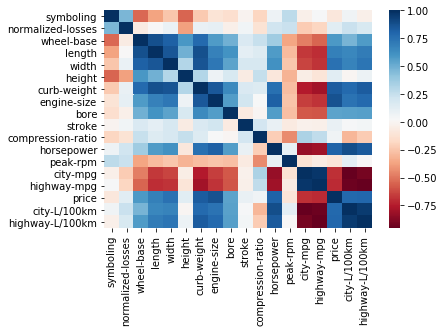

In [100]:
%matplotlib inline
sns.heatmap(df.corr(),cmap='RdBu');

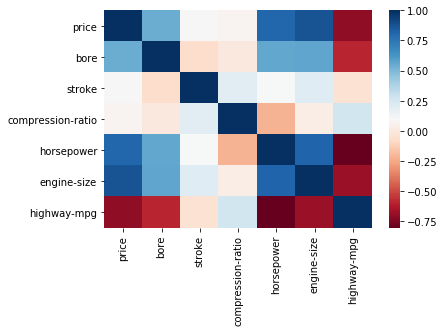

In [102]:
sns.heatmap(df[['price','bore','stroke','compression-ratio','horsepower','engine-size','highway-mpg']].corr(),cmap='RdBu')

Continuous numerical variables are variables that may contain any value within some range. Numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

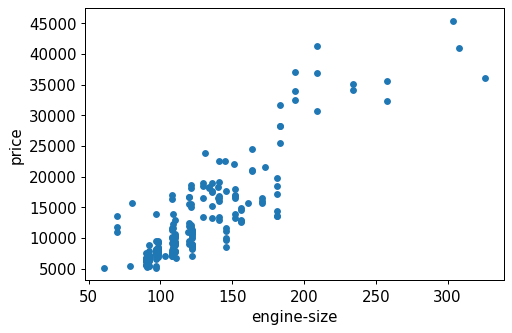

In [38]:
df.plot(kind='scatter', x='engine-size', y = 'price');

**Seaborn** is nice to analyse quickly linear relationship. In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using <code>sns.regplot()</code>, which plots the scatterplot plus the fitted regression line for the data.</p>

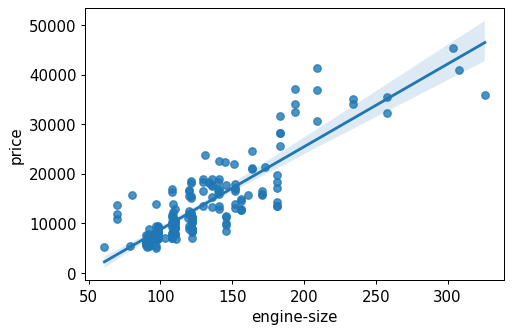

In [229]:
# Engine size as potential predictor variable of price
# https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial
sns.regplot(x="engine-size", y="price", data=df);

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.  
We can examine the correlation between 'engine-size' and 'price' and see it's approximately  0.87.

In [43]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.873887
price,0.873887,1.000000


Highway mpg is a potential predictor variable of price. Negative relation.

In [3]:
# plot the regplot of 'highway-mpg' and 'price'
# ...
#  ...

<font color=blue>Click here for **Solution**
<!--sns.regplot(x='highway-mpg', y='price', data=df);-->


**Weak Linear Relationship**

Let's see if "Peak-rpm" as a predictor variable of "price".

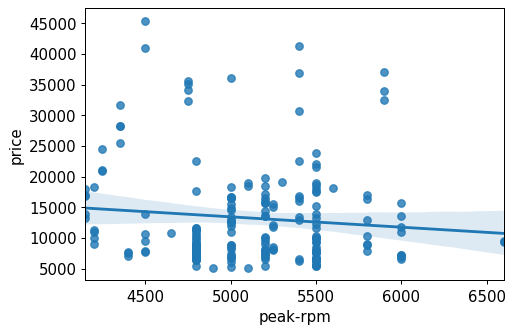

In [234]:
sns.regplot(x="peak-rpm", y="price", data=df);

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616. 

In [14]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


## What to do with categorical data?

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

In [107]:
# this also includes categorical columns
df.describe(include='object')

# df.describe(include='all')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,199,199,199,199,199,199,199,199,199,199
unique,21,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,179,163,114,94,116,196,143,155,90


**Look at distributions**

In [10]:
# how to plot them?
df['make'].value_counts()

# plot a bar plot to visualize the distribution of each car brand in our data set
# ...
#  ...

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

<font color=blue>Click here for **Solution**
<!-- df['make'].value_counts().plot(kind='bar') -->

### Relationship between categorical variable and numerical 

**Boxplot**
Boxplots are a great way to visualize numeric data, since you can visualize the various distributions of the data.  
<img src='img/boxplot.png'>  
The main features that the boxplot shows the “median” of the data, which represents where the middle datapoint is. The Upper Quartile shows where the ”75th percentile” is, the Lower Quartile shows where the “25th percentile” is. The data between the Upper and Lower Quartile represents the Interquartile Range(IQR). Next, you have the Lower and Upper Extremes. These are calculated as 1.5 times the interquartile range above the 75th percentile, and as 1.5 times the IQR below the 25th percentile.
Finally, boxplots also display “outliers” as individual dots that occur outside the upper and lower extremes. With boxplots, you can easily spot outliers
and also see the distribution and skewness of the data.

Let's look at the relationship between "body-style" and "price". (less messy than 'make'[later])

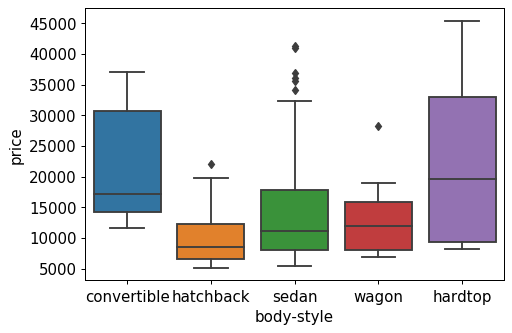

In [11]:
sns.boxplot(x="body-style", y="price", data=df);

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

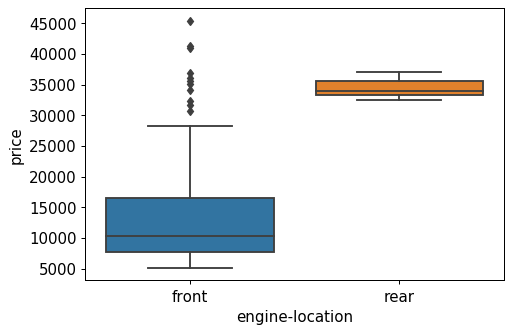

In [230]:
sns.boxplot(x="engine-location", y="price", data=df);

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

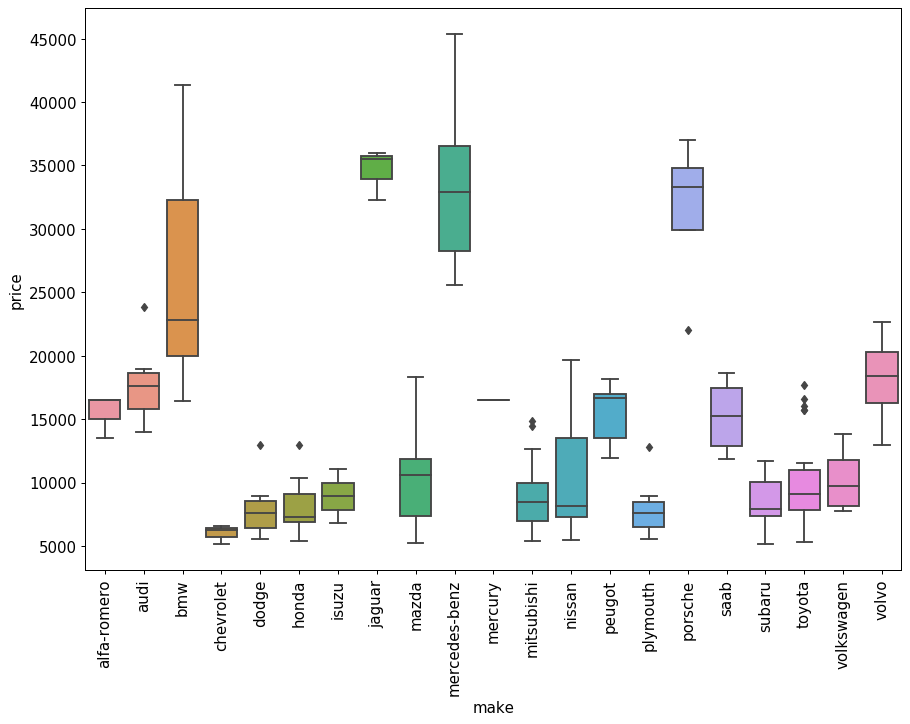

In [212]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x="make", y="price", data=df , ax = ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

 Let's examine "drive-wheels" and "price".

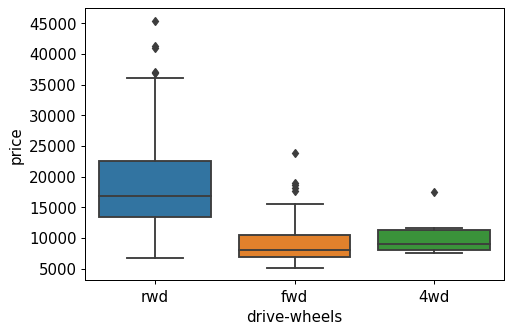

In [231]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df);

Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

<h3>Value Counts</h3>

Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

In [147]:
df['drive-wheels'].value_counts()

fwd    116
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a Dataframe as follows :

In [148]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,116
rwd,75
4wd,8


In [149]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,196
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

### Basics of Grouping

The <code>.groupby()</code> method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.  

For example, let’s group by the variable 'drive-wheels'. We see that there are 3 different categories of drive wheels.

In [26]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>

In [232]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one.head(7)

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0


We can then calculate the average price for each of the different categories of data.

In [209]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels']).mean()
df_group_one

,price
drive-wheels,
4wd,10241.000000
fwd,9238.741379
rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [13]:
# plot the mean price for each car brand ('make') as a bar plot
#  ...
# ...


<font color=blue>Click here for **Solution**
<!--df[['make','price']].groupby(['make']).mean().sort_values(['price'],ascending=False).plot(kind='bar'); -->

You can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [155]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8365.166667
6,fwd,sedan,9811.800000
7,fwd,wagon,10061.181818
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:</p>

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>

In [233]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8365.166667   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd           10061.181818  
rwd           16994.222222

<font color=blue>Use the "groupby" function to find the average "price" of each car based on "body-style" ?

In [158]:
# Write your code below and press Shift+Enter to execute 


<font color=blue>Double-click **here** for the solution.

<!-- The answer is below:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle-->

**Variables: Drive Wheels and Body Style vs Price**

Let's use a heat map to visualize the relationship between Body Style vs Price.

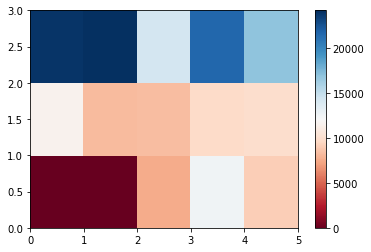

In [34]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>

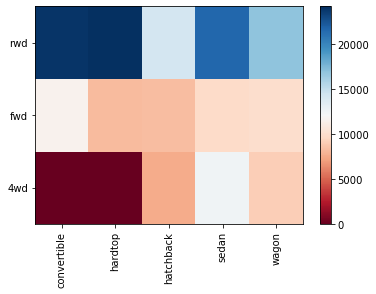

In [35]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python Visualizations course. (**Maybe?**) 

The main question we want to answer in this Notebook, is "What are the main characteristics which have the most impact on the car price?".  

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?

## Correlation and **P-value**

**Correlation**: a measure of the extent of interdependence between variables.

### Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables X and Y.  
The resulting coefficient is a value between -1 and 1 inclusive, where:
- **1**: Total positive linear correlation.
- **0**: No linear correlation, the two variables most likely do not affect each other.
- **-1**: Total negative linear correlation.

Pearson Correlation is the default method of the function "corr".  Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.

In [36]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


 sometimes we would like to know the significant of the correlation estimate. 

**P-value**:  
What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the
- p-value is < 0.001: we say there is strong evidence that the correlation is significant.
- the p-value is < 0.05: there is moderate evidence that the correlation is significant.
- the p-value is < 0.1: there is weak evidence that the correlation is significant.
- the p-value is > 0.1: there is no evidence that the correlation is significant.

 We can obtain this information using  "stats" module in the "scipy"  library.

In [159]:
from scipy import stats

**Wheel-base vs Price**

Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 

In [160]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5837967812893918  with a P-value of P = 1.4313694393588297e-19


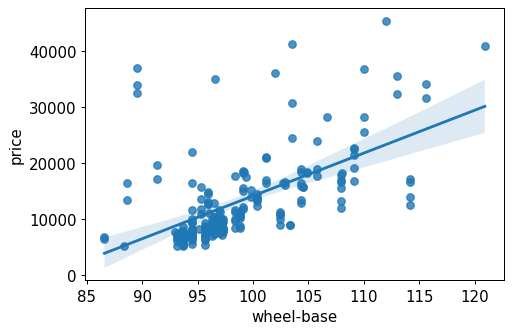

In [235]:
sns.regplot(x='wheel-base',y='price',data= df);

**Conclusion:**. 
Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

**Horsepower vs Price** 

 Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [163]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8738869517981516  with a P-value of P =  1.26506744790746e-63


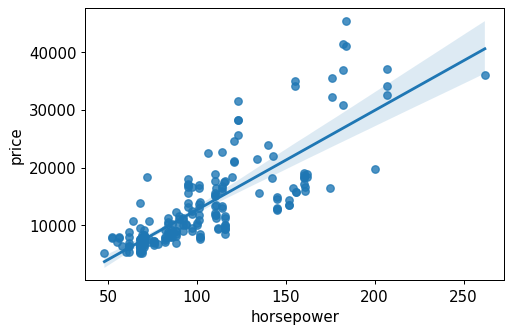

In [200]:
sns.regplot(x='horsepower',y='price',data= df);

**Conclusion:** Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

**Length vs Price**  
Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [201]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.693964774564687  with a P-value of P =  6.398310603050564e-30


**Conclusion:** Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

**Width vs Price**

In [41]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


**Conclusion:** Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

**Curb-weight vs Price**

In [42]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


**Conclusion:** 
Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

**Engine-size vs Price**

In [43]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


**Conclusion:** Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

**Bore vs Price**

In [44]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


**Conclusion:** Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

 We can relate the process for each 'City-mpg'  and 'Highway-mpg':

**peak-rpm vs Price**

In [166]:
pearson_coef, p_value = stats.pearsonr(df['peak-rpm'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.10164886620219896  with a P-value of P =  0.15311824317200226


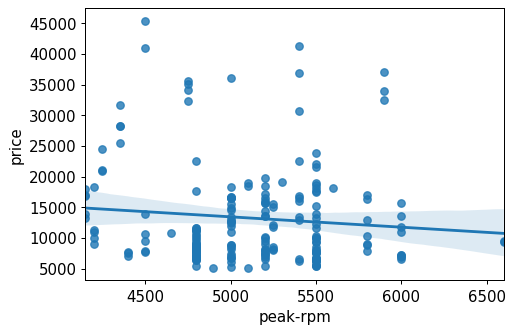

In [184]:
sns.regplot(x='peak-rpm',y='price',data=df);

**Conclusion:**
Since the p-value is $>$ 0.001, the correlation between preak-rpm and price is **not** statistically significant.

**Highway-mpg vs Price**

In [46]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


**Conclusion:**
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

## ANOVA

### ANOVA: Analysis of Variance 
The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**:  P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

### Drive Wheels

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.  

Let's see if different types 'drive-wheels' impact  'price', we group the data.

In [197]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
134,4wd,7603.0


In [198]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
194,rwd,sedan,16845.0
195,rwd,sedan,19045.0
196,rwd,sedan,21485.0
197,rwd,sedan,22470.0


 We can obtain the values of the method group using the method "get_group".  

In [199]:
grouped_test2.get_group('4wd')['price']

4      17450.0
134     7603.0
138     9233.0
139    11259.0
142     8013.0
143    11694.0
148     7898.0
149     8778.0
Name: price, dtype: float64

we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.

In [50]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

**Separately: fwd and rwd**

In [51]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


 Let's examine the other groups 

**4wd and rwd**

In [52]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


**4wd and fwd**

In [53]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


In [57]:
df_test = df[['body-style', 'price']]
df_grp = df_test.groupby(['body-style'], as_index=False).mean()
df_grp

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


## Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it from 25 down to the following variables:

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

    
Categorical variables:
- Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. Parts of this notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>

## Data from JARVIS-DFT material science database for transport

In [15]:
transport = pd.read_csv('data/transport_data.csv')

In [16]:
transport.head()

,JID,Composition,Spg.numb.,Spg.symb.,Cryst.,Dimensionality,OPT SCF gap,MBJ gap,n-Seebeck,p-Seebeck,n-powerfact,p-powerfact,n-cond,p-cond,n-ZT,p-ZT,Avg.elec.mass,Avg.hole mass,n-mp-Seeb,p-mp-Seeb
0,JVASP-11946,CoNi,221,Pm-3m,cubic,3D,0.0014,na,0.961888,1.222762,4.700324,7.596687,5080181.100,5080898.4,0.000032,0.000052,6.02E-07,6.02E-07,na,na
1,JVASP-11947,Co3Ni,221,Pm-3m,cubic,3D,0.0020,na,-10.482988,-10.485942,806.719601,806.052709,7340952.800,7330752.2,0.004465,0.004464,3.85E-07,3.85E-07,na,na
2,JVASP-11948,NbCo,221,Pm-3m,cubic,3D,0.0060,na,6.934228,7.322567,228.848702,255.567886,4759400.000,4766279.7,0.001691,0.001890,6.20E-07,6.20E-07,na,na
3,JVASP-11949,MgNi,221,Pm-3m,cubic,3D,0.0098,na,-33.241584,-33.659304,7516.497514,7626.886106,6802242.300,6731889.8,0.046990,0.048042,4.16E-07,4.16E-07,na,na
4,JVASP-11950,Al3Ni2,164,P-3m1,trigonal,3D,0.0142,na,0.833245,0.807617,4.317753,4.464905,5916231.033,5917223.3,0.000028,0.000028,4.95E-07,4.95E-07,1.443050267,1.353046533


In [169]:
transport.replace('na',np.nan,inplace=True)

In [170]:
transport.describe()

,OPT SCF gap,n-Seebeck,p-Seebeck,n-powerfact,p-powerfact,n-cond,p-cond,n-ZT,p-ZT
count,21900.000000,21900.000000,21900.000000,2.190000e+04,2.190000e+04,2.190000e+04,2.190000e+04,21900.000000,21900.000000
mean,0.894798,-86.801903,130.474578,1.094329e+04,9.838414e+03,3.670460e+07,3.602706e+07,0.210996,0.236221
std,1.553322,132.515990,176.834421,8.462154e+05,6.145520e+05,2.143420e+09,2.063786e+09,0.329692,0.366007
min,0.000000,-837.591900,-190.903983,1.900000e-05,6.540000e-05,1.348240e-01,6.055463e+00,-0.034453,-0.027415
25%,0.004500,-160.253060,-2.777215,1.773004e+02,1.688806e+02,4.342760e+04,1.389656e+04,0.005048,0.005026
50%,0.020500,-15.259287,16.725221,5.941523e+02,5.326346e+02,3.448052e+05,3.414340e+05,0.035981,0.034727
75%,1.316000,3.330726,310.042315,1.207261e+03,1.208887e+03,2.724585e+06,2.722481e+06,0.308336,0.383083
max,17.968200,1052.161600,639.504300,1.109545e+08,7.133573e+07,2.360000e+11,2.270000e+11,4.043423,4.728755


In [171]:
transport.describe(include = 'object')

,JID,Composition,Spg.numb.,Spg.symb.,Cryst.,Dimensionality,MBJ gap,Avg.elec.mass,Avg.hole mass,n-mp-Seeb,p-mp-Seeb
count,21900,21899,21883,21883,21883,21883,9578,21868,21868,9343,9343
unique,21897,17293,191,191,7,4,5327,11607,11607,8682,8682
top,JVASP-51,CdI2,225,Fm-3m,cubic,3D,0.0003,1.08E-06,1.08E-06,-90.75178867,96.43899633
freq,2,51,3120,3120,6524,19404,65,44,44,5,5


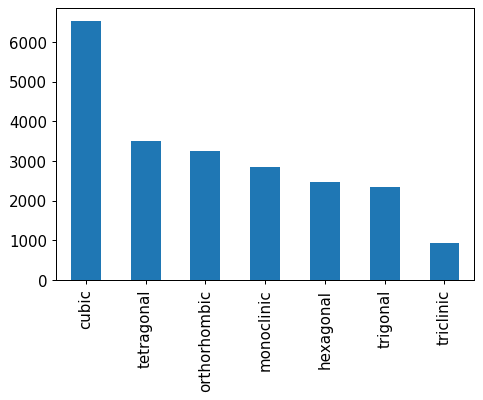

In [186]:
transport['Cryst.'].value_counts()
# plot bar plot
# ...

(-1000, 10000)

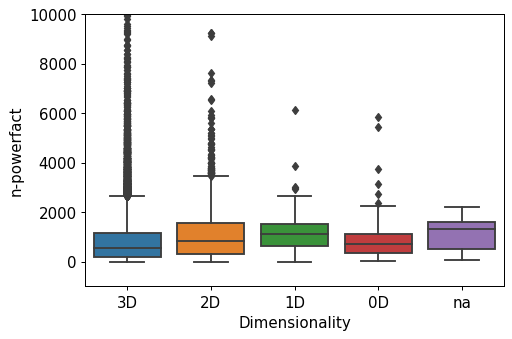

In [17]:
ax = sns.boxplot(x = "Dimensionality", y = "n-powerfact", data = transport)
plt.ylim(-1000, 10**(4))

In [182]:
transport["Dimensionality"].value_counts()

3D    19404
2D     1996
0D      304
1D      179
Name: Dimensionality, dtype: int64

## A little bit more about getting data.

www.kaggle.com

**The five important steps involved in Data Analysis**
1. Getting the data
2. Cleaning data
3. Exploration
4. Building a Model
5. Presenting results and story telling